In [41]:
import warnings
from keras import backend as K
if K.backend()=='tensorflow':
    K.set_image_dim_ordering("th")

In [42]:
import time
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.optimizers import SGD
from keras.layers.normalization import BatchNormalization
% matplotlib inline
np.random.seed(2017)

In [43]:
# Load MNIST dataset from keras
from keras.datasets import mnist
(train_features, train_labels), (test_features, test_labels) = mnist.load_data()
_, img_rows, img_cols =  train_features.shape

# Set the number of classes (10 for MNIST dataset)
num_classes = len(np.unique(train_labels))
num_input_nodes = img_rows*img_cols
print("Number of training samples: %d"%train_features.shape[0])
print("Number of test samples: %d"%test_features.shape[0])
print("Image rows: %d"%train_features.shape[1])
print("Image columns: %d"%train_features.shape[2])
print("Number of classes: %d"%num_classes)

Number of training samples: 60000
Number of test samples: 10000
Image rows: 28
Image columns: 28
Number of classes: 10


## Preprocessing MNIST data
There are 60000 training examples and 10000 testing example in the MNIST dataset that comes with Keras. Since the dataset is in grayscale, we set the number of channels to 1 (instead of 3 for RGB images).


In [44]:
# Reshape data
train_features = train_features.reshape(train_features.shape[0], 1, img_rows, img_cols)
test_features = test_features.reshape(test_features.shape[0], 1, img_rows, img_cols)

train_features = train_features.astype('float32')
test_features = test_features.astype('float32')

# Normalize data
train_features /= 255
test_features /= 255

In [45]:
# Apply one-hot encoding to the labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

## Plotting model accuracy and loss
Plotting the model accuracy and loss during training is an important tool to measure model performance and reevaluate model hypermeters.

In [46]:
def plot_model_history(model_history):
    # Set figure size and settings
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    
    # Plot accuracy over time
    axs[0].plot(range(1, len(model_history.history['acc'])+1), model_history.history['acc'])
    axs[0].plot(range(1, len(model_history.history['val_acc'])+1), model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1), len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    
    # Plot loss over time
    axs[1].plot(range(1, len(model_history.history['loss'])+1), model_history.history['loss'])
    axs[1].plot(range(1, len(model_history.history['val_loss'])+1), model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1, len(model_history.history['loss'])+1), len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [47]:
# Use MAPE (Mean Absolute Percantage Error) for error propagation
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct) / result.shape[0]
    
    return (accuracy * 100)

## Constructing the CNN model

In [48]:
# Initialize model
model = Sequential()
# Add convolutional layer
model.add(Convolution2D(32, [5, 5], strides=(1, 1), padding='valid', input_shape=(1, 28, 28))) 
# Add activation layer to add non-linearity
model.add(Activation("relu"))
# Apply pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(num_classes))
# Add softmax layer
model.add(Activation("softmax"))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 131s - loss: 0.3377 - acc: 0.9064 - val_loss: 0.1264 - val_acc: 0.9656
Epoch 2/20
 - 121s - loss: 0.1017 - acc: 0.9708 - val_loss: 0.0798 - val_acc: 0.9785
Epoch 3/20
 - 127s - loss: 0.0704 - acc: 0.9799 - val_loss: 0.0698 - val_acc: 0.9800
Epoch 4/20
 - 122s - loss: 0.0563 - acc: 0.9838 - val_loss: 0.0584 - val_acc: 0.9823
Epoch 5/20
 - 121s - loss: 0.0481 - acc: 0.9859 - val_loss: 0.0545 - val_acc: 0.9833
Epoch 6/20
 - 126s - loss: 0.0423 - acc: 0.9878 - val_loss: 0.0577 - val_acc: 0.9820
Epoch 7/20
 - 127s - loss: 0.0377 - acc: 0.9886 - val_loss: 0.0504 - val_acc: 0.9839
Epoch 8/20
 - 131s - loss: 0.0340 - acc: 0.9900 - val_loss: 0.0564 - val_acc: 0.9817
Epoch 9/20
 - 129s - loss: 0.0312 - acc: 0.9905 - val_loss: 0.0502 - val_acc: 0.9853
Epoch 10/20
 - 124s - loss: 0.0273 - acc: 0.9915 - val_loss: 0.0581 - val_acc: 0.9807
Epoch 11/20
 - 126s - loss: 0.0245 - acc: 0.9928 - val_loss: 0.0523 - val_acc: 0.9839
Epoch 12/20
 

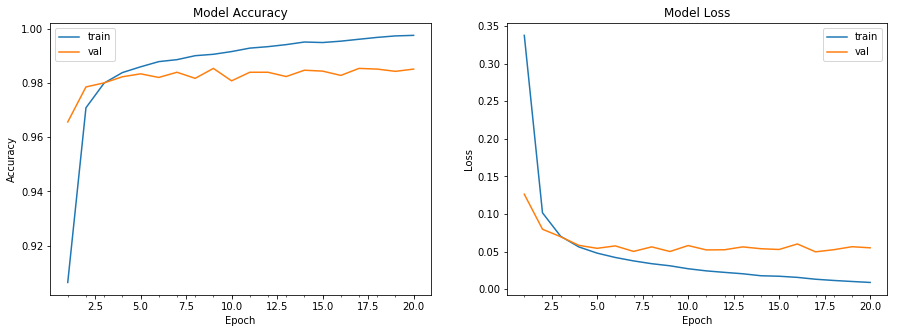

Model took 2397.49 seconds to train
Accuracy on test data is: 98.83


In [49]:
# Compile and train the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
start = time.time()
model_info = model.fit(train_features, train_labels, batch_size=128, \
                         epochs=20, verbose=2, validation_split=0.2)
end = time.time()

# Plot model accuracy and loss over time
plot_model_history(model_info)

print("Model took %0.2f seconds to train"%(end - start))
print("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

We can try to add a new layer to increase the accuracy of our model.

In [50]:
# Add a new layer
model_2 = Sequential()
model_2.add(Convolution2D(32, [3, 3], strides=(1, 1), padding='valid', input_shape=(1, 28, 28)))
model_2.add(Activation("relu"))
model_2.add(Convolution2D(32, [3, 3], strides=(1, 1),  padding='valid'))
model_2.add(Activation("relu"))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Flatten())
model_2.add(Dense(128))
model_2.add(Activation("relu"))
model_2.add(Dense(num_classes))
model_2.add(Activation("softmax"))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 275s - loss: 0.1961 - acc: 0.9436 - val_loss: 0.0658 - val_acc: 0.9803
Epoch 2/20
 - 271s - loss: 0.0549 - acc: 0.9829 - val_loss: 0.0545 - val_acc: 0.9847
Epoch 3/20
 - 271s - loss: 0.0351 - acc: 0.9889 - val_loss: 0.0494 - val_acc: 0.9857
Epoch 4/20
 - 271s - loss: 0.0227 - acc: 0.9929 - val_loss: 0.0559 - val_acc: 0.9847
Epoch 5/20
 - 292s - loss: 0.0170 - acc: 0.9945 - val_loss: 0.0416 - val_acc: 0.9885
Epoch 6/20
 - 292s - loss: 0.0125 - acc: 0.9959 - val_loss: 0.0662 - val_acc: 0.9820
Epoch 7/20
 - 296s - loss: 0.0113 - acc: 0.9962 - val_loss: 0.0497 - val_acc: 0.9870
Epoch 8/20
 - 289s - loss: 0.0078 - acc: 0.9975 - val_loss: 0.0526 - val_acc: 0.9871
Epoch 9/20
 - 297s - loss: 0.0057 - acc: 0.9982 - val_loss: 0.0466 - val_acc: 0.9896
Epoch 10/20
 - 296s - loss: 0.0063 - acc: 0.9980 - val_loss: 0.0658 - val_acc: 0.9853
Epoch 11/20
 - 279s - loss: 0.0063 - acc: 0.9977 - val_loss: 0.0476 - val_acc: 0.9893
Epoch 12/20
 

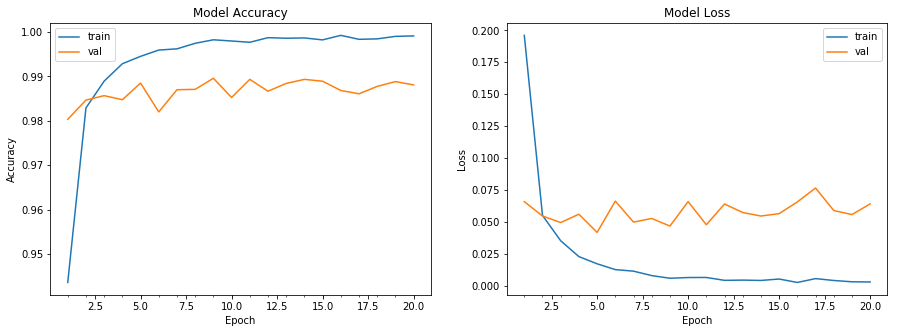

Model took 5771.08 seconds to train
Accuracy on test data is: 98.87


In [51]:
# Compile and train the model
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
start = time.time()
model_2_info = model_2.fit(train_features, train_labels, batch_size=128, \
                         epochs=20, verbose=2, validation_split=0.2)
end = time.time()

# Plot model accuracy and loss over time
plot_model_history(model_2_info)

print("Model took %0.2f seconds to train"%(end - start))
print("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model_2))

### Observation
By increasing the number of layers, we increased the test accuracy but also increased the training time.

In [54]:
# Add dropout
model_3 = Sequential()
model_3.add(Convolution2D(32, [3, 3], strides=(1, 1), padding='valid', input_shape=(1, 28, 28)))
model_3.add(Activation("relu"))
model_3.add(Convolution2D(32, [3, 3], strides=(1, 1),  padding='valid'))
model_3.add(Activation("relu"))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))
model_3.add(Flatten())
model_3.add(Dense(128))
model_3.add(Dropout(0.5))
model_3.add(Activation("relu"))
model_3.add(Dense(num_classes))
model_3.add(Activation("softmax"))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 346s - loss: 0.3082 - acc: 0.9050 - val_loss: 0.0681 - val_acc: 0.9797
Epoch 2/20
 - 337s - loss: 0.1010 - acc: 0.9703 - val_loss: 0.0524 - val_acc: 0.9848
Epoch 3/20
 - 350s - loss: 0.0769 - acc: 0.9764 - val_loss: 0.0429 - val_acc: 0.9870
Epoch 4/20
 - 349s - loss: 0.0633 - acc: 0.9804 - val_loss: 0.0392 - val_acc: 0.9884
Epoch 5/20
 - 331s - loss: 0.0546 - acc: 0.9834 - val_loss: 0.0375 - val_acc: 0.9886
Epoch 6/20
 - 353s - loss: 0.0480 - acc: 0.9850 - val_loss: 0.0343 - val_acc: 0.9906
Epoch 7/20
 - 345s - loss: 0.0440 - acc: 0.9866 - val_loss: 0.0371 - val_acc: 0.9895
Epoch 8/20
 - 325s - loss: 0.0395 - acc: 0.9875 - val_loss: 0.0361 - val_acc: 0.9895
Epoch 9/20
 - 306s - loss: 0.0361 - acc: 0.9883 - val_loss: 0.0338 - val_acc: 0.9906
Epoch 10/20
 - 326s - loss: 0.0342 - acc: 0.9888 - val_loss: 0.0387 - val_acc: 0.9887
Epoch 11/20
 - 303s - loss: 0.0296 - acc: 0.9900 - val_loss: 0.0334 - val_acc: 0.9906
Epoch 12/20
 

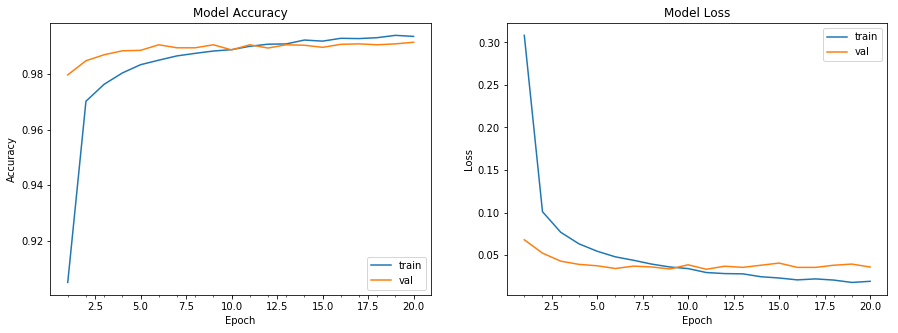

Model took 6608.27 seconds to train
Accuracy on test data is: 99.16


In [53]:
# Compile and train the model
model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
start = time.time()
model_3_info = model_3.fit(train_features, train_labels, batch_size=128, \
                         epochs=20, verbose=2, validation_split=0.2)
end = time.time()

# Plot model accuracy and loss over time
plot_model_history(model_3_info)

print("Model took %0.2f seconds to train"%(end - start))
print("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model_3))

### Observation
Adding the droput layer increases the test accuracy while increasing the training time. Dropout layer adds regularization to the network by preventing weights to converge at the same position. During forward propagation, nodes are turned off randomly while all nodes are turned on during forward propagartion.